In [1]:
import yfinance as yf

In [2]:
initial_data = yf.download("ASM.AS 2303.TW 2330.TW IFNNY ADSK ADBE SAP MSFT CRM GOOG DTE.DE IDR.VI 6701.T UU.L VVD.SG AWK SVT.L IAM.SN SU.PA DE CNHI VWS.CO IR UNH ELV CI LIN"
                           , start="2021-01-04", end="2024-01-04")

[*********************100%%**********************]  27 of 27 completed


In [3]:
def calculate_sharpe_ratio(returns, weights):
    # 計算投資組合的期望收益
    portfolio_return = np.sum(returns.mean() * weights) * 252  

    # 計算投資組合的波動率
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # 計算夏普比率
    sharpe_ratio = portfolio_return / portfolio_volatility

    return sharpe_ratio

In [4]:
def calculate_sharpe_ratio_with_risk_free(returns, weights, risk_free_rate):
    # 計算投資組合的預期回報率
    portfolio_return = np.sum(returns.mean() * weights) * 252  # 252個交易日的年度平均

    # 計算無風險利率調整後的夏普比率
    excess_return = portfolio_return - risk_free_rate
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = excess_return / portfolio_volatility

    return sharpe_ratio

In [5]:
import numpy as np
from scipy.optimize import minimize
import yfinance as yf

# original data
initial_data = yf.download("ASM.AS 2303.TW 2330.TW IFNNY ADSK ADBE SAP MSFT CRM GOOG DTE.DE IDR.VI 6701.T UU.L VVD.SG AWK SVT.L IAM.SN SU.PA DE CNHI VWS.CO IR UNH ELV CI LIN",
                           start="2019-01-04", end="2024-01-04")['Adj Close']

# 計算每支股票的日收益率
daily_returns = initial_data.pct_change()

# 刪除包含缺失值的行
daily_returns = daily_returns.dropna()

# 計算夏普比率的目標函數（考慮無風險利率）
def objective_function(weights, returns, risk_free_rate):
    # 假設有一個函數計算夏普比率，這裡僅作示例
    portfolio_return = np.sum(returns.mean() * weights) * 252  # 252個交易日的年度平均
    excess_return = portfolio_return - risk_free_rate
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = excess_return / portfolio_volatility
    return -sharpe_ratio  # 最大化夏普比率等於最小化相反的夏普比率

# 初始猜測值
initial_weights = np.ones(len(initial_data.columns)) / len(initial_data.columns)

# 定義權重的約束（權重總和為1）
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# 權重的上下限
bounds = [(0, 1) for _ in range(len(initial_data.columns))]

risk_free_rate = 0.02659

# 使用 minimize 函數找到最小值（最大化夏普比率）
result_with_risk_free = minimize(objective_function, initial_weights, args=(daily_returns, risk_free_rate),
                                  method='SLSQP', bounds=bounds, constraints=constraints)

# 顯示結果
print("Optimal Weights (with risk-free rate):\n", result_with_risk_free.x)
print("Optimal Sharpe Ratio (with risk-free rate):", -result_with_risk_free.fun)

[*********************100%%**********************]  27 of 27 completed
Optimal Weights (with risk-free rate):
 [2.19255669e-01 1.13384147e-01 1.47901990e-01 3.48861592e-16
 2.06168558e-15 2.04535014e-01 2.17991538e-15 2.21810813e-15
 3.16980800e-15 2.04559011e-15 2.91691924e-02 2.13092472e-15
 1.18179125e-15 3.19659448e-17 2.27225092e-15 1.28560529e-15
 3.13310203e-16 4.66873541e-02 3.70936328e-17 1.00780093e-01
 3.01466436e-15 1.07641616e-16 1.01228560e-03 4.85263587e-02
 8.87478951e-02 1.97521881e-15 2.14884255e-16]
Optimal Sharpe Ratio (with risk-free rate): 1.7555781447299363


In [6]:
optimal_weights = [2.19255669e-01, 1.13384147e-01, 1.47901990e-01, 3.48861592e-16,
 2.06168558e-15, 2.04535014e-01, 2.17991538e-15, 2.21810813e-15,
 3.16980800e-15, 2.04559011e-15, 2.91691924e-02, 2.13092472e-15,
 1.18179125e-15, 3.19659448e-17, 2.27225092e-15, 1.28560529e-15,
 3.13310203e-16, 4.66873541e-02, 3.70936328e-17, 1.00780093e-01,
 3.01466436e-15, 1.07641616e-16, 1.01228560e-03, 4.85263587e-02,
 8.87478951e-02, 1.97521881e-15, 2.14884255e-16]


# 將科學記號轉換為阿拉伯數字
optimal_weights_in_decimal = ["{:.10f}".format(weight) for weight in optimal_weights]

# 顯示結果
print("Optimal Weights in Decimal:\n", optimal_weights_in_decimal)

Optimal Weights in Decimal:
 ['0.2192556690', '0.1133841470', '0.1479019900', '0.0000000000', '0.0000000000', '0.2045350140', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0291691924', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0466873541', '0.0000000000', '0.1007800930', '0.0000000000', '0.0000000000', '0.0010122856', '0.0485263587', '0.0887478951', '0.0000000000', '0.0000000000']


In [7]:
stock_weights = dict(zip(initial_data.columns, optimal_weights_in_decimal))

for stock, weight in stock_weights.items():
    print(f"Stock: {stock}, Weight: {weight}")

Stock: 2303.TW, Weight: 0.2192556690
Stock: 2330.TW, Weight: 0.1133841470
Stock: 6701.T, Weight: 0.1479019900
Stock: ADBE, Weight: 0.0000000000
Stock: ADSK, Weight: 0.0000000000
Stock: ASM.AS, Weight: 0.2045350140
Stock: AWK, Weight: 0.0000000000
Stock: CI, Weight: 0.0000000000
Stock: CNHI, Weight: 0.0000000000
Stock: CRM, Weight: 0.0000000000
Stock: DE, Weight: 0.0291691924
Stock: DTE.DE, Weight: 0.0000000000
Stock: ELV, Weight: 0.0000000000
Stock: GOOG, Weight: 0.0000000000
Stock: IAM.SN, Weight: 0.0000000000
Stock: IDR.VI, Weight: 0.0000000000
Stock: IFNNY, Weight: 0.0000000000
Stock: IR, Weight: 0.0466873541
Stock: LIN, Weight: 0.0000000000
Stock: MSFT, Weight: 0.1007800930
Stock: SAP, Weight: 0.0000000000
Stock: SU.PA, Weight: 0.0000000000
Stock: SVT.L, Weight: 0.0010122856
Stock: UNH, Weight: 0.0485263587
Stock: UU.L, Weight: 0.0887478951
Stock: VVD.SG, Weight: 0.0000000000
Stock: VWS.CO, Weight: 0.0000000000


In [8]:
# Setting New Weights

import numpy as np

new_optimal_weights = np.array([0.132174248, 0.0966506700, 0.0940061050, 0.01,
                                0.1391707720, 0.02-0.0010040060, 0.0303845658, 0.0526657592, 0.0525218840,
                                0.0010040060, 0.0316941385,
                                0.1697278523, 0.1010040052, 0.01, 0.04, 0.02])


weights_sum = np.sum(new_optimal_weights)

print("Total weights sum:", weights_sum)

Total weights sum: 1.0


In [9]:
##Newest One
initial_data1 = yf.download("2303.TW 2330.TW 6701.T ADBE ASM.AS AWK DE IR MSFT SVT.L UNH UU.L VVD.SG WTRG TTEK XYL",
                            start="2019-01-04", end="2024-01-04")

# 新的權重
new_optimal_weights = np.array([0.132174248, 0.0966506700, 0.0940061050, 0.01,
                                0.1391707720, 0.02-0.0010040060, 0.0303845658, 0.0526657592, 0.0525218840,
                                0.0010040060, 0.0316941385,
                                0.1697278523, 0.1010040052, 0.01, 0.04, 0.02])

[*********************100%%**********************]  16 of 16 completed


In [10]:
import numpy as np
import pandas as pd
import yfinance as yf

# 下載股票數據
initial_data1 = yf.download("2303.TW 2330.TW 6701.T ADBE ASM.AS AWK DE IR MSFT SVT.L UNH UU.L VVD.SG WTRG TTEK XYL",
                            start="2019-01-04", end="2024-01-04")

# 新的權重
new_optimal_weights = np.array([0.132174248, 0.0966506700, 0.0940061050, 0.01,
                                0.1391707720, 0.02-0.0010040060, 0.0303845658, 0.0526657592, 0.0525218840,
                                0.0010040060, 0.0316941385,
                                0.1697278523, 0.1010040052, 0.01, 0.04, 0.02])

# 計算每支股票的日收益率
daily_returns = initial_data1['Adj Close'].pct_change()

# 刪除包含缺失值的行
daily_returns = daily_returns.dropna()

# 計算投資組合的日收益率
portfolio_daily_returns = np.dot(daily_returns, new_optimal_weights)

# 計算投資組合的年化收益率
annualized_portfolio_return = np.mean(portfolio_daily_returns) * 252

# 計算夏普比率
risk_free_rate = 0.02659
annualized_portfolio_volatility = np.std(portfolio_daily_returns) * np.sqrt(252)
sharpe_ratio = (annualized_portfolio_return - risk_free_rate) / annualized_portfolio_volatility

# 計算總報酬和總波動率
total_return = np.prod(1 + portfolio_daily_returns) - 1
total_volatility = np.std(portfolio_daily_returns)

print("投資組合的年化報酬率:", annualized_portfolio_return)
print("投資組合的夏普比率:", sharpe_ratio)
print("投資組合的總波動率（年化）:", annualized_portfolio_volatility)
print("投資組合的總報酬率:", total_return)
print("投資組合的總波動率:", total_volatility)

[*********************100%%**********************]  16 of 16 completed
投資組合的年化報酬率: 0.3181407840521369
投資組合的夏普比率: 1.6165722610750186
投資組合的總波動率（年化）: 0.18035122281403987
投資組合的總報酬率: 3.7424181222601787
投資組合的總波動率: 0.01136105914791305


[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  1 of 1 completed


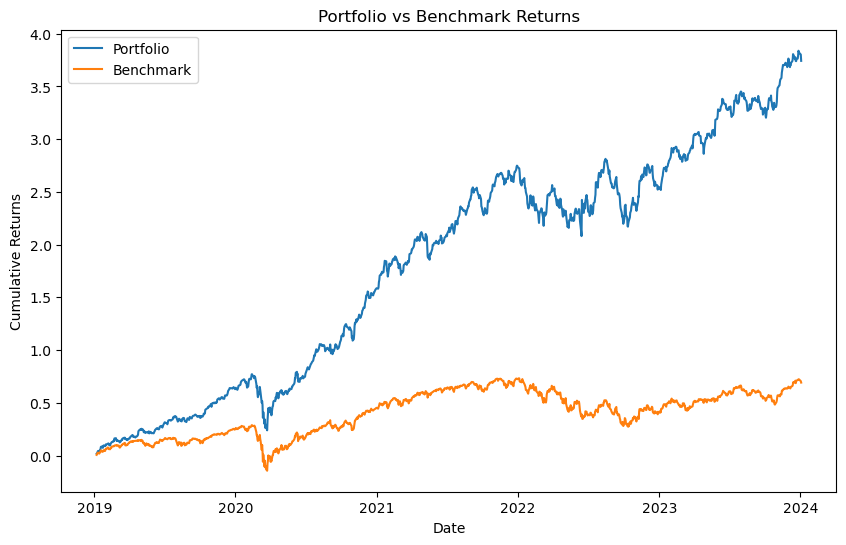

In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 下載股票數據
stocks = ['2303.TW', '2330.TW', '6701.T', 'ADBE', 'ASM.AS', 'AWK', 'DE', 'IR', 'MSFT', 'SVT.L', 'UNH', 'UU.L', 'VVD.SG', 'WTRG','TTEK','XYL']
initial_data = yf.download(stocks, start="2019-01-04", end="2024-01-04")['Adj Close']

# 下載 MSCI World Index 指數數據
sp500_data = yf.download('ACWI', start="2019-01-04", end="2024-01-04")['Adj Close']

# 新的權重
new_optimal_weights = np.array([0.132174248, 0.0966506700, 0.0940061050, 0.01,
                                0.1391707720, 0.02-0.0010040060, 0.0303845658, 0.0526657592, 0.0525218840,
                                0.0010040060, 0.0316941385,
                                0.1697278523, 0.1010040052, 0.01, 0.04, 0.02])

# 計算每支股票的日收益率
daily_returns = initial_data.pct_change()

# 刪除包含缺失值的行
daily_returns = daily_returns.dropna()

# 計算投資組合的日收益率
portfolio_daily_returns = np.dot(daily_returns, new_optimal_weights)

# 計算投資組合的累積收益率
cumulative_portfolio_returns = (1 + portfolio_daily_returns).cumprod() - 1

# 轉換為 Pandas Series
cumulative_portfolio_returns = pd.Series(cumulative_portfolio_returns, index=daily_returns.index)

# 計算 S&P 500 指數的日收益率
sp500_daily_returns = sp500_data.pct_change()

# 刪除包含缺失值的行
sp500_daily_returns = sp500_daily_returns.dropna()

# 計算 S&P 500 指數的累積收益率
cumulative_sp500_returns = (1 + sp500_daily_returns).cumprod() - 1

# 轉換為 Pandas Series
cumulative_sp500_returns = pd.Series(cumulative_sp500_returns, index=sp500_daily_returns.index)

# 繪製折線圖
plt.figure(figsize=(10, 6))
plt.plot(cumulative_portfolio_returns.index, cumulative_portfolio_returns, label='Portfolio')
plt.plot(cumulative_sp500_returns.index, cumulative_sp500_returns, label='Benchmark')
plt.title('Portfolio vs Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()